[nltk_data] Downloading package punkt to C:\Users\JYOTHSNA
[nltk_data]     V\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\JYOTHSNA
[nltk_data]     V\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


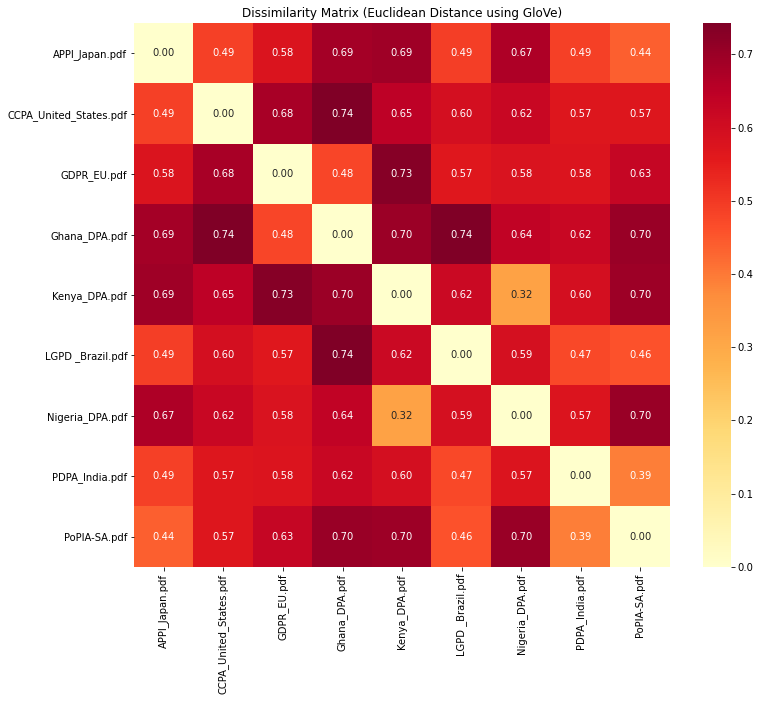

In [2]:
import os
import numpy as np
import PyPDF2
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('punkt')
nltk.download('stopwords')

# Load GloVe model
def load_glove_model(glove_file_path):
    embeddings = {}
    with open(glove_file_path, 'r', encoding='utf8') as f:
        for line in f:
            values = line.strip().split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

# Extract and clean text from PDF
def extract_text_from_pdf(pdf_path):
    text = ""
    with open(pdf_path, 'rb') as f:
        reader = PyPDF2.PdfReader(f)
        for page in reader.pages:
            text += page.extract_text() or ""
    return text.lower()

# Convert document to vector
def document_to_vector(text, glove_model, dim=100):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    words = [w for w in tokens if w.isalpha() and w not in stop_words]
    
    vectors = [glove_model[w] for w in words if w in glove_model]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(dim)

# Main analysis
def analyze_folder(folder_path, glove_file_path):
    glove_model = load_glove_model(glove_file_path)
    doc_vectors = []
    file_names = []

    for filename in os.listdir(folder_path):
        if filename.endswith(".pdf"):
            file_path = os.path.join(folder_path, filename)
            text = extract_text_from_pdf(file_path)
            vector = document_to_vector(text, glove_model)
            doc_vectors.append(vector)
            file_names.append(filename)

    # Compute pairwise Euclidean distances
    distance_matrix = euclidean_distances(doc_vectors)
    plt.figure(figsize=(12, 10))
    # Display heatmap
    sns.heatmap(distance_matrix, xticklabels=file_names, yticklabels=file_names, cmap='YlOrRd', annot=True, fmt=".2f")
    plt.title("Dissimilarity Matrix (Euclidean Distance using GloVe)")
    plt.show()

    return distance_matrix, file_names

folder_path = r"D:\Project_Apr_2025\DATA_PROTECTION_LAWS"
glove_path = r"D:\Project_Apr_2025\Untitled Folder\glove.6B.100d.txt"  # Download from https://nlp.stanford.edu/projects/glove/

distance_matrix, file_list = analyze_folder(folder_path, glove_path)



[nltk_data] Downloading package punkt to C:\Users\JYOTHSNA
[nltk_data]     V\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\JYOTHSNA
[nltk_data]     V\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


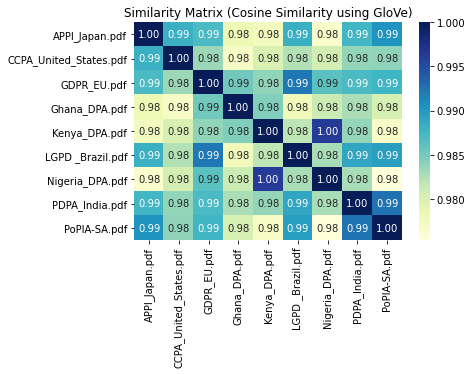

In [5]:
import os
import numpy as np
import PyPDF2
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('punkt')
nltk.download('stopwords')

# Load GloVe model
def load_glove_model(glove_file_path):
    embeddings = {}
    with open(glove_file_path, 'r', encoding='utf8') as f:
        for line in f:
            values = line.strip().split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

# Extract and clean text from PDF
def extract_text_from_pdf(pdf_path):
    text = ""
    with open(pdf_path, 'rb') as f:
        reader = PyPDF2.PdfReader(f)
        for page in reader.pages:
            text += page.extract_text() or ""
    return text.lower()

# Convert document to vector
def document_to_vector(text, glove_model, dim=100):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    words = [w for w in tokens if w.isalpha() and w not in stop_words]
    
    vectors = [glove_model[w] for w in words if w in glove_model]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(dim)

# Main analysis
def analyze_folder_cosine(folder_path, glove_file_path):
    glove_model = load_glove_model(glove_file_path)
    doc_vectors = []
    file_names = []

    for filename in os.listdir(folder_path):
        if filename.endswith(".pdf"):
            file_path = os.path.join(folder_path, filename)
            text = extract_text_from_pdf(file_path)
            vector = document_to_vector(text, glove_model)
            doc_vectors.append(vector)
            file_names.append(filename)

    # Compute pairwise cosine similarity
    similarity_matrix = cosine_similarity(doc_vectors)
    
    # Display heatmap
    sns.heatmap(similarity_matrix, xticklabels=file_names, yticklabels=file_names, cmap='YlGnBu', annot=True, fmt=".2f")
    plt.title("Similarity Matrix (Cosine Similarity using GloVe)")
    plt.show()

    return similarity_matrix, file_names

# Provide your paths here
folder_path = r"D:\Project_Apr_2025\DATA_PROTECTION_LAWS"
glove_path = r"D:\Project_Apr_2025\Untitled Folder\glove.6B.100d.txt"

similarity_matrix, file_list = analyze_folder_cosine(folder_path, glove_path)


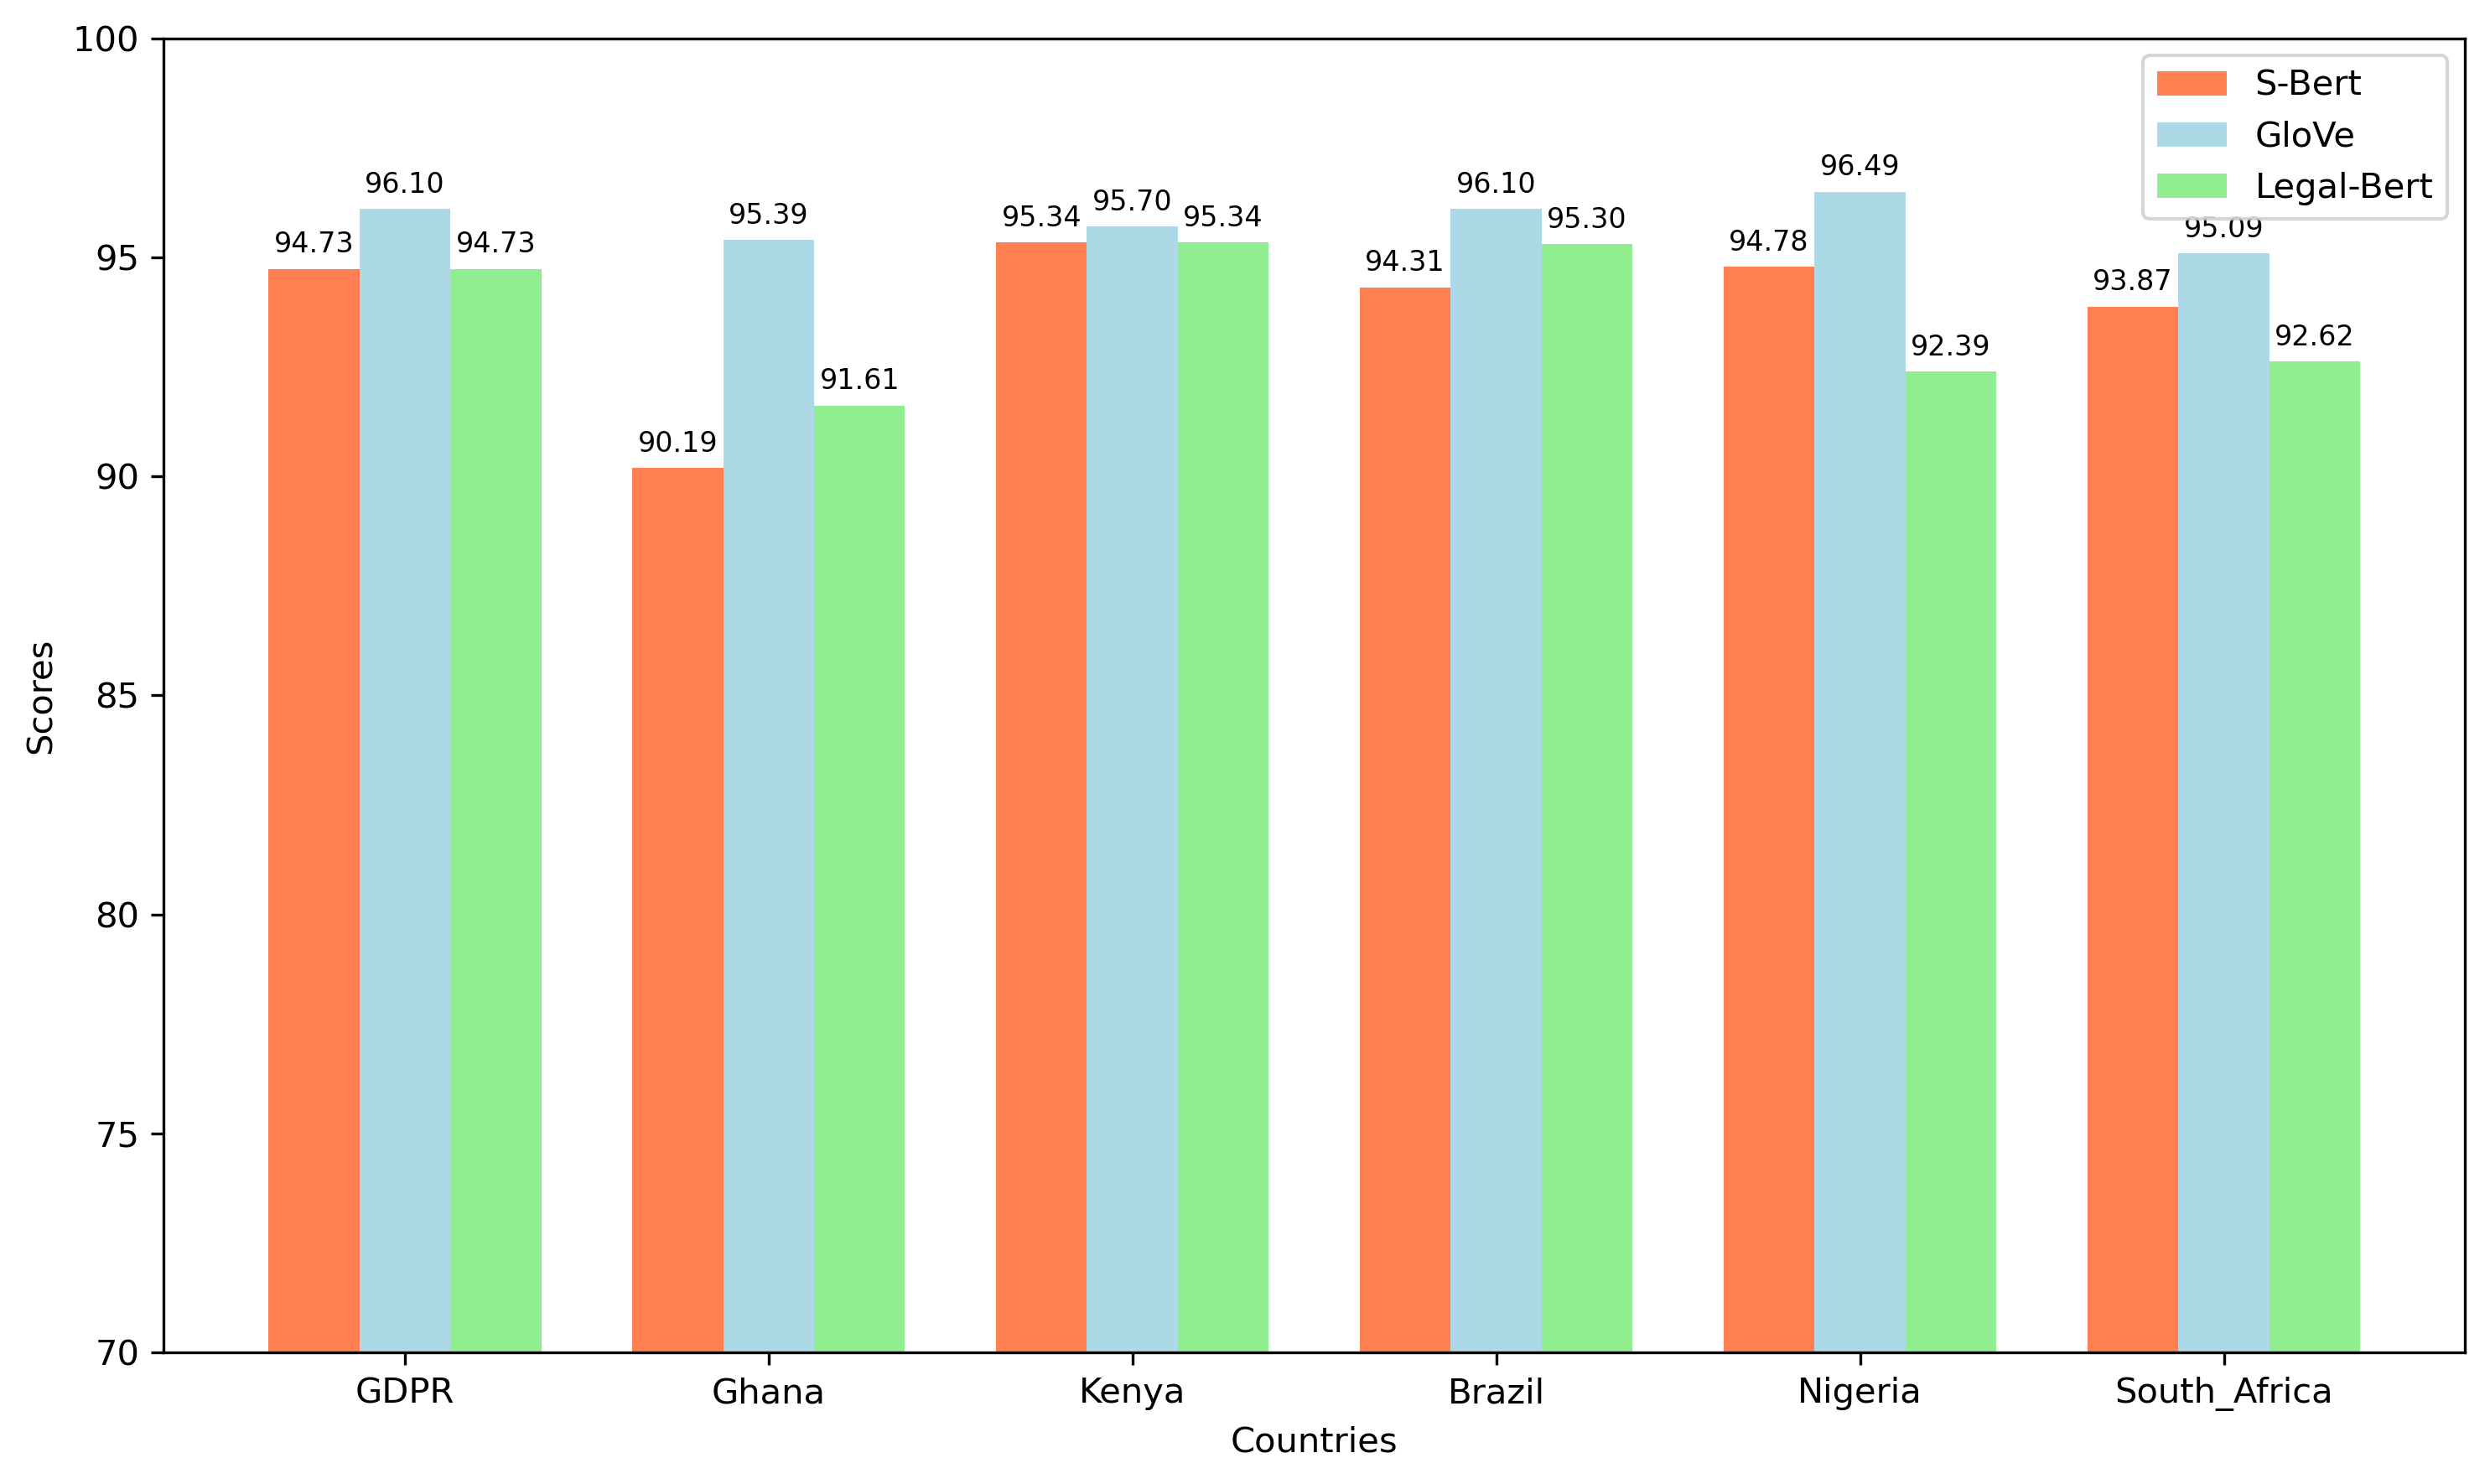

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data
X = ['GDPR', 'Ghana', 'Kenya', 'Brazil', 'Nigeria', 'South_Africa']
Yb = [94.73, 90.19, 95.34, 94.31, 94.78, 93.87]
Yg = [96.10, 95.39, 95.70, 96.10, 96.49, 95.09]
Yl = [94.73, 91.61, 95.34, 95.30, 92.39, 92.62]

# X positions
x = np.arange(len(X))
width = 0.25  # width of each bar

# Plotting
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)  # Set DPI here

bar1 = ax.bar(x - width, Yb, width, label='S-Bert', color='coral')
bar2 = ax.bar(x , Yg, width, label='GloVe', color='lightblue')
bar3 = ax.bar(x + width, Yl, width, label='Legal-Bert', color='lightgreen')

# Labels and Titles
ax.set_xlabel('Countries')
ax.set_ylabel('Scores')
#ax.set_title('Comparison of SBert and GloVe Relevance  Scores per Country')
ax.set_xticks(x)
ax.set_xticklabels(X)
ax.set_ylim(70,100)
ax.legend()

# Annotate values on bars
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()

# Save as image with high DPI
plt.savefig("yb_yg__yl_bargraph.png", dpi=300)

plt.show()


[nltk_data] Downloading package punkt to C:\Users\JYOTHSNA
[nltk_data]     V\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\JYOTHSNA
[nltk_data]     V\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


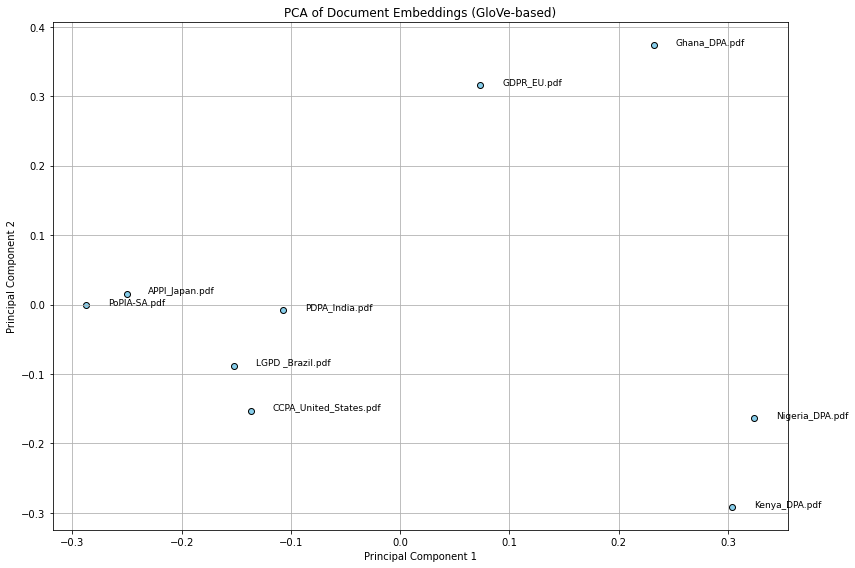

In [3]:
import os
import numpy as np
import PyPDF2
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')

# Load GloVe model
def load_glove_model(glove_file_path):
    embeddings = {}
    with open(glove_file_path, 'r', encoding='utf8') as f:
        for line in f:
            values = line.strip().split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

# Extract and clean text from PDF
def extract_text_from_pdf(pdf_path):
    text = ""
    with open(pdf_path, 'rb') as f:
        reader = PyPDF2.PdfReader(f)
        for page in reader.pages:
            text += page.extract_text() or ""
    return text.lower()

# Convert document to vector
def document_to_vector(text, glove_model, dim=100):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    words = [w for w in tokens if w.isalpha() and w not in stop_words]
    
    vectors = [glove_model[w] for w in words if w in glove_model]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(dim)

# PCA Analysis and Plotting
def analyze_with_pca(folder_path, glove_file_path):
    glove_model = load_glove_model(glove_file_path)
    doc_vectors = []
    file_names = []

    for filename in os.listdir(folder_path):
        if filename.endswith(".pdf"):
            file_path = os.path.join(folder_path, filename)
            text = extract_text_from_pdf(file_path)
            vector = document_to_vector(text, glove_model)
            doc_vectors.append(vector)
            file_names.append(filename)

    doc_vectors = np.array(doc_vectors)

    # Reduce dimensions using PCA
    pca = PCA(n_components=2)
    reduced_vectors = pca.fit_transform(doc_vectors)

    # Plot the document vectors in 2D
    plt.figure(figsize=(12, 8))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c='skyblue', edgecolors='k')

    for i, filename in enumerate(file_names):
        plt.text(reduced_vectors[i, 0] + 0.02, reduced_vectors[i, 1], filename, fontsize=12)

    plt.title("PCA of Document Embeddings (GloVe-based)")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.tight_layout()
    plt.show()

    return reduced_vectors, file_names

# === Run Analysis ===
folder_path = r"D:\Project_Apr_2025\DATA_PROTECTION_LAWS"
glove_path = r"D:\Project_Apr_2025\Untitled Folder\glove.6B.100d.txt"

reduced_vectors, file_names = analyze_with_pca(folder_path, glove_path)


[nltk_data] Downloading package punkt to C:\Users\JYOTHSNA
[nltk_data]     V\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\JYOTHSNA
[nltk_data]     V\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


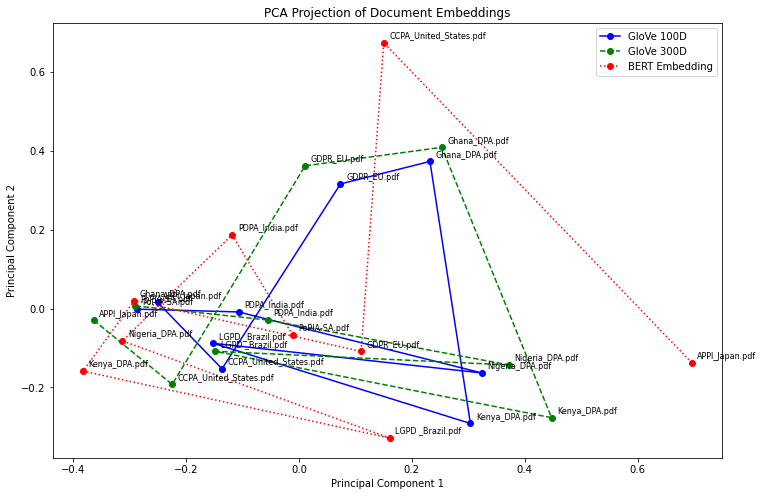

In [4]:
import os
import numpy as np
import PyPDF2
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer

nltk.download('punkt')
nltk.download('stopwords')

# Load GloVe model
def load_glove_model(glove_file_path):
    embeddings = {}
    with open(glove_file_path, 'r', encoding='utf8') as f:
        for line in f:
            values = line.strip().split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

# Extract and clean text from PDF
def extract_text_from_pdf(pdf_path):
    text = ""
    with open(pdf_path, 'rb') as f:
        reader = PyPDF2.PdfReader(f)
        for page in reader.pages:
            text += page.extract_text() or ""
    return text.lower()

# Convert document to GloVe vector
def document_to_glove_vector(text, glove_model, dim):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    words = [w for w in tokens if w.isalpha() and w not in stop_words]
    
    vectors = [glove_model[w] for w in words if w in glove_model]
    return np.mean(vectors, axis=0) if vectors else np.zeros(dim)

# BERT model setup
bert_model = SentenceTransformer('all-MiniLM-L6-v2')

# Combined PCA and Plotting
def analyze_with_multiple_embeddings(folder_path, glove_100_path, glove_300_path):
    glove_100 = load_glove_model(glove_100_path)
    glove_300 = load_glove_model(glove_300_path)

    glove_100_vecs = []
    glove_300_vecs = []
    bert_vecs = []
    file_names = []

    for filename in os.listdir(folder_path):
        if filename.endswith(".pdf"):
            file_path = os.path.join(folder_path, filename)
            text = extract_text_from_pdf(file_path)
            file_names.append(filename)

            # GloVe 100D
            vec_100 = document_to_glove_vector(text, glove_100, 100)
            glove_100_vecs.append(vec_100)

            # GloVe 300D
            vec_300 = document_to_glove_vector(text, glove_300, 300)
            glove_300_vecs.append(vec_300)

            # BERT Sentence Embedding
            bert_vec = bert_model.encode(text, convert_to_numpy=True)
            bert_vecs.append(bert_vec)

    # PCA reduction
    def reduce_and_plot(vectors, label, color, linestyle='-'):
        vectors = np.array(vectors)
        pca = PCA(n_components=2)
        reduced = pca.fit_transform(vectors)
        x, y = reduced[:, 0], reduced[:, 1]
        plt.plot(x, y, linestyle=linestyle, color=color, marker='o', label=label)
        for i, name in enumerate(file_names):
            plt.text(x[i]+0.01, y[i]+0.01, name, fontsize=8)
        return reduced

    plt.figure(figsize=(12, 8))
    reduce_and_plot(glove_100_vecs, "GloVe 100D", "blue")
    reduce_and_plot(glove_300_vecs, "GloVe 300D", "green", linestyle='--')
    reduce_and_plot(bert_vecs, "BERT Embedding", "red", linestyle=':')

    plt.title("PCA Projection of Document Embeddings")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend()
    plt.show()

# === Run the comparison ===
folder_path = r"D:\Project_Apr_2025\DATA_PROTECTION_LAWS"
glove_100_path = r"D:\Project_Apr_2025\Untitled Folder\glove.6B.100d.txt"
glove_300_path = r"D:\Project_Apr_2025\Untitled Folder\glove.6B.300d.txt"

analyze_with_multiple_embeddings(folder_path, glove_100_path, glove_300_path)


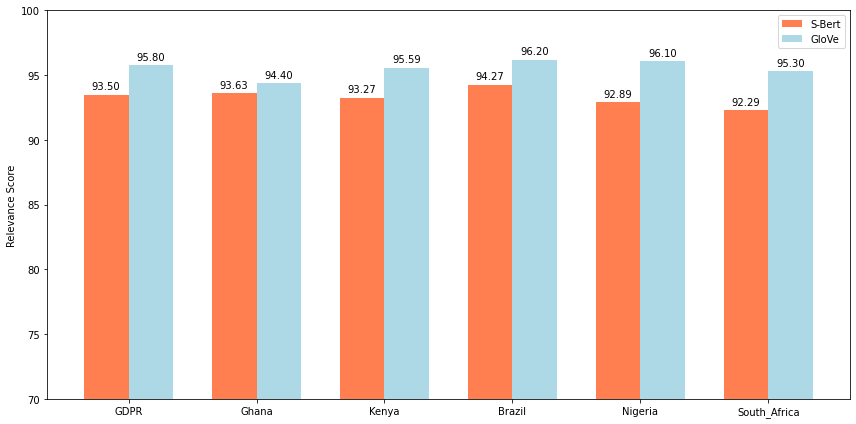

In [10]:

import matplotlib.pyplot as plt
import numpy as np

# Provided values
YB = [93.50,93.63,93.27,94.27,92.89,92.29]
YG = [95.80,94.40,95.59,96.20,96.10,95.30]

labels = ['GDPR', 'Ghana', 'Kenya', 'Brazil', 'Nigeria', 'South_Africa']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, YB, width, label='S-Bert', color='coral')
rects2 = ax.bar(x + width/2, YG, width, label='GloVe', color='lightblue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Relevance Score')
ax.set_ylim(70,100)
#ax.set_title('Comparison of SBert and GloVe Relevance Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Attach a text label above each bar in rects
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()




In [5]:
"""no two
YB = [97.95, 93.55, 96.91, 96.79, 97.91, 96.42]
YG = [98.10, 96.70, 97.79, 97.69, 98.60, 97.89]"""

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-5-3ed292b937d5>, line 2)

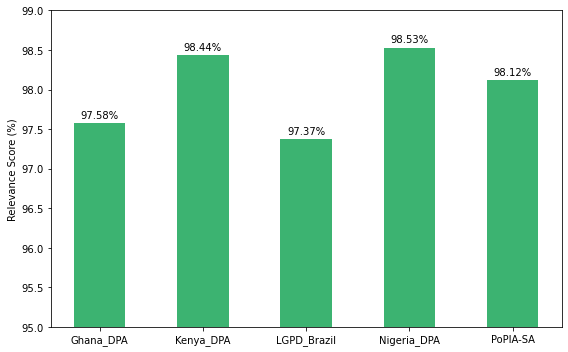

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Provided values
labels = ["Ghana_DPA", "Kenya_DPA", "LGPD_Brazil", "Nigeria_DPA", "PoPIA-SA"]
values = [97.58, 98.44, 97.37, 98.53, 98.12]

# Adjust bar positions to reduce spacing
x = np.linspace(0, len(labels) - 1, len(labels))  # even spacing
width = 0.5

fig, ax = plt.subplots(figsize=(8,5))
rects = ax.bar(x, values, width, color='mediumseagreen')

ax.set_ylabel('Relevance Score (%)')
ax.set_ylim(95,99)
ax.set_xticks(x)
ax.set_xticklabels(labels)

for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}%',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()
